<a href="https://colab.research.google.com/github/dannn585/investment-app/blob/master/pandas_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
#データを整理する（ディクショナリ形式）
data = {
    '銘柄コード': [7203, 9984, 6758],
    '銘柄名': ['トヨタ自動車', 'ソフトバンクG', 'ソニーグループ'],
    '保有数量': [100,50,30],
    '購入単価': [2500,6000,13000]
}

In [4]:
#辞書データをデータフレーム（表）に変換
df = pd.DataFrame(data)
df

,銘柄コード,銘柄名,保有数量,購入単価
0,7203,トヨタ自動車,100,2500
1,9984,ソフトバンクG,50,6000
2,6758,ソニーグループ,30,13000


In [5]:
df['投資額'] = df['保有数量'] * df['購入単価']
df

,銘柄コード,銘柄名,保有数量,購入単価,投資額
0,7203,トヨタ自動車,100,2500,250000
1,9984,ソフトバンクG,50,6000,300000
2,6758,ソニーグループ,30,13000,390000


In [6]:
df['投資額'].sum()

np.int64(940000)

In [7]:
#'portfolio.xlsx'という名前でexcelファイルを保存
df.to_excel('portfolio.xlsx', index = False)

In [8]:
#ファイルを読み込んで新しい変数　df_new に入れる
df_new = pd.read_excel('portfolio.xlsx')

In [9]:
df_new

,銘柄コード,銘柄名,保有数量,購入単価,投資額
0,7203,トヨタ自動車,100,2500,250000
1,9984,ソフトバンクG,50,6000,300000
2,6758,ソニーグループ,30,13000,390000


In [10]:
df_new[df_new['投資額'] > 300000]

,銘柄コード,銘柄名,保有数量,購入単価,投資額
2,6758,ソニーグループ,30,13000,390000


In [11]:
df_new.sort_values(by = '投資額', ascending = False)

,銘柄コード,銘柄名,保有数量,購入単価,投資額
2,6758,ソニーグループ,30,13000,390000
1,9984,ソフトバンクG,50,6000,300000
0,7203,トヨタ自動車,100,2500,250000


In [12]:
#2月分の架空データを作成
data_feb = {
    '銘柄コード': [7203, 9984, 6758],
    '銘柄名': ['トヨタ自動車', 'ソフトバンクG', 'ソニーグループ'],
    '保有数量': [110, 50, 40],
    '購入単価': [2600, 6100, 13500]
}

df_feb = pd.DataFrame(data_feb)
df_feb['投資額'] = df_feb['保有数量'] * df_feb['購入単価']

#新しい名前で保存
df_feb.to_excel('portfolio_feb.xlsx', index = False)

In [13]:
import glob

#「portfolio」で始まるすべてのxlsxファイル名を取得する
files = glob.glob('portfolio*.xlsx')
print(files)

['portfolio_feb.xlsx', 'portfolio.xlsx']


In [14]:
all_data = [] #空のバケツ

for file in files:
  df = pd.read_excel(file)
  all_data.append(df)

In [15]:
#バケツの中身をすべて結合して、一つの表にする
df_all = pd.concat(all_data, ignore_index = True)

#中身を確認
df_all

,銘柄コード,銘柄名,保有数量,購入単価,投資額
0,7203,トヨタ自動車,110,2600,286000
1,9984,ソフトバンクG,50,6100,305000
2,6758,ソニーグループ,40,13500,540000
3,7203,トヨタ自動車,100,2500,250000
4,9984,ソフトバンクG,50,6000,300000
5,6758,ソニーグループ,30,13000,390000


In [16]:
#銘柄名でグループ化して、投資額の合計を出す
report_df = df_all.groupby('銘柄名')['投資額'].sum()

#結果を表示
report_df

,投資額
銘柄名,
ソニーグループ,930000
ソフトバンクG,605000
トヨタ自動車,536000


In [17]:
report_df.sort_values(ascending = False)

,投資額
銘柄名,
ソニーグループ,930000
ソフトバンクG,605000
トヨタ自動車,536000


<Axes: xlabel='銘柄名'>

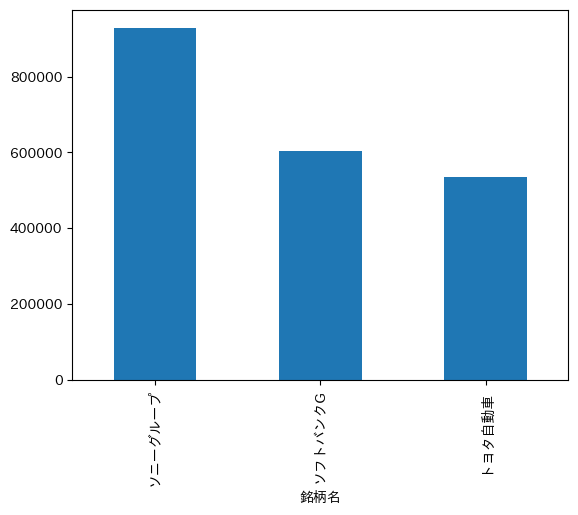

In [21]:
#棒グラフを作成する
report_df.sort_values(ascending = False).plot(kind = 'bar')

In [20]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8e4a796dc8c6eb344197c0ed1463ddb01f0cb4eb1006ce60aeea18129051c77c
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib
